In [1]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import re
from scipy.stats import pearsonr, median_abs_deviation

from pathlib import Path

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet, cut_tree
from scipy.spatial.distance import pdist
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn import metrics
import sys
sys.setrecursionlimit(10000)
import os

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# final ivt vs native
CBF5GAL = "modification_calls/20190610_R941_CBF5GAL.csv"
CBF5GLU = "modification_calls/20190611_R941_CBF5GLU.csv"
NOP58GAL = "modification_calls/20190617_R941_NOP58GAL.csv"
NOP58GLU = "modification_calls/20190619_R941_NOP58GLU.csv"
IVT = "modification_calls/20191014_R941_IVT.csv"
mutant448 = "modification_calls/20210405_R941_mutant448.csv"
WT_YPD = "modification_calls/20210410_R941_WT_YPD.csv"
WT_KOAC = "modification_calls/20210412_R941_WT_KOAC.csv"
mutant452 = "modification_calls/20210413_R941_mutant452.csv"
WT_CY = "modification_calls/20210414_R941_WT_CY.csv"
mutant451 = "modification_calls/20210415_R941_mutant451.csv"
WT_PB = "modification_calls/20210520_R941_WT_PB.csv"
WT_stationary = "modification_calls/20210521_R941_WT_stationary.csv"
Dbp3d_YPD = "modification_calls/20210527_R941_Dbp3d_YPD.csv"
trl1d_YPD = "modification_calls/20210528_R941_trl1d_YPD.csv"
WT_rapa5 = "modification_calls/20210531_R941_WT_rapa5.csv"
Mix = "modification_calls/20210618_R941_Mix.csv"
prp43 = "modification_calls/20210619_R941_prp43.csv"
MIX_2 = "modification_calls/20210716_R941_MIX.csv"
YS603_18_YEPD = "modification_calls/20210717_R941_YS603_18_YEPD.csv"
prp16_18deg_YPD = "modification_calls/20210719_R941_prp16_18deg_YPD.csv"
spp382_YPD = "modification_calls/20210720_R941_spp382_YPD.csv"
R941_YS602_18_YPD = "modification_calls/20210722_R941_R941_YS602_18_YPD.csv"
dbr1d_YPD = "modification_calls/20210729_R941_dbr1d_YPD.csv"
sqs1d_YPD = "modification_calls/20210730_R941_sqs1d_YPD.csv"
snR4d_YPD = "modification_calls/20210823_R941_snR4d_YPD.csv"
snR45d_YPD = "modification_calls/20210824_R941_snR45d_YPD.csv"
mutant448_2 = "modification_calls/20210825_R941_mutant448.csv"
snR4d_alpha_YPD = "modification_calls/20210902_R941_snR4d_alpha_YPD.csv"

In [3]:
# snoRNA mix 
all_file_paths = [WT_YPD, spp382_YPD, dbr1d_YPD, prp16_18deg_YPD, WT_PB] 
all_labels = ["1WT_YPD", "3spp382_YPD", "2dbr1d_YPD", "4prp16_18deg_YPD", "5WT_PB"] 
vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")


<IPython.core.display.Javascript object>


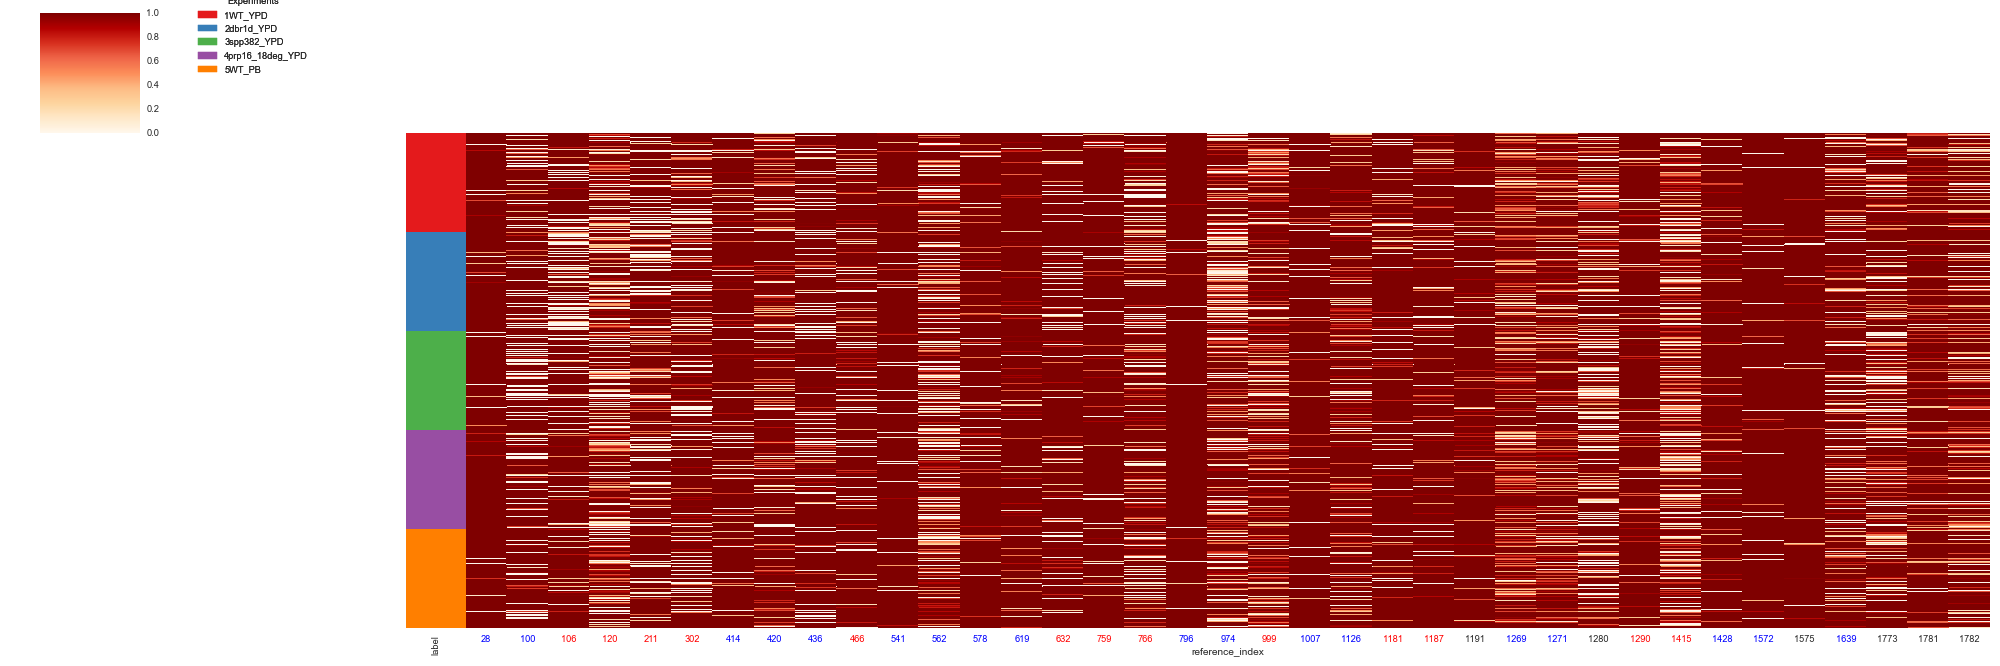

<IPython.core.display.Javascript object>


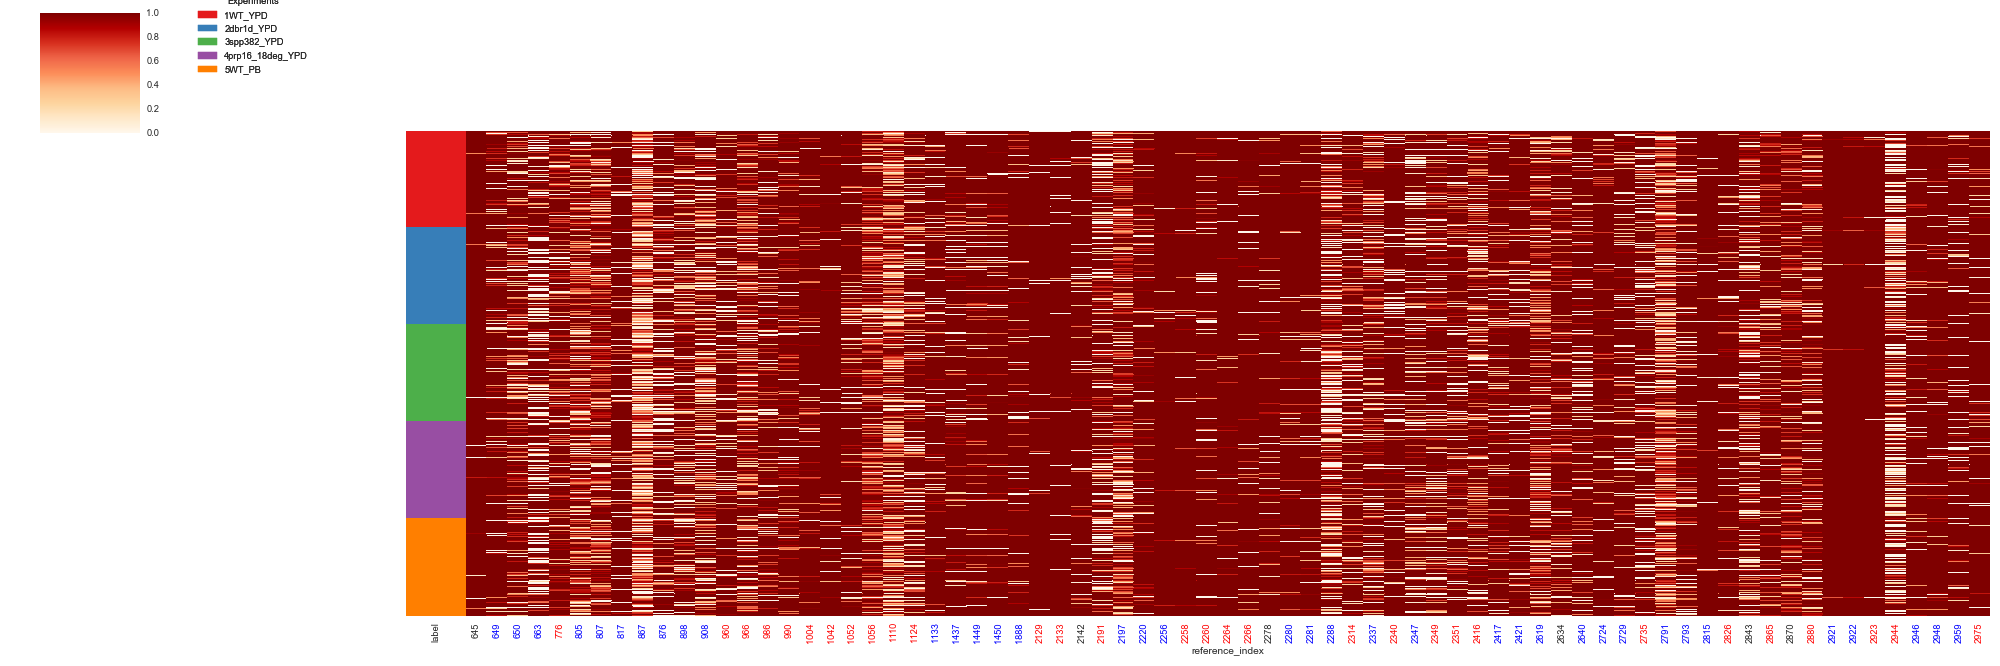

In [6]:
%matplotlib notebook

n = 500
figsize = (30, 10)
save_fig_path = None
metric = "euclidean"
legend = True
method = "ward"

label = None
contig = 'RDN18-1'
contigs = ['RDN18-1', 'RDN25-1']
Path("figures/splicing_mutants").mkdir(parents=True, exist_ok=True)

for contig in contigs:
#     save_fig_path = None
    save_fig_path = f"figures/splicing_mutants/{contig}_splicing_mutations_heatmap.png"
    g = vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                                   metric=metric,
                                   method=method, 
                                   label=label,
                                   col_cluster=False,
                                   row_cluster=False,
                                   twoprimeo_pos=None,
                                   pseduo_u_pos=None,
                                   legend=legend,
                                   figsize=figsize)


In [8]:
diff_table = {}
for x in all_labels:
    for contig in contigs:
        wt_mod = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label="WT_YPD")
        mod = vc.get_contig_percent_mod(contig, vc.get_contig_positions(contig), label=x)
        diff = (wt_mod - mod)
        diff_table[f"{x}_{contig}"] = diff

diff_table = pd.DataFrame(diff_table)


In [10]:
for x in all_labels:
    for contig in contigs:
        over_10_percent = diff_table[f"{x}_{contig}"][diff_table[f"{x}_{contig}"] > 0.1].sort_values(ascending=False)
        print(x, over_10_percent)

WT_YPD Series([], Name: WT_YPD_RDN18-1, dtype: float64)
WT_YPD Series([], Name: WT_YPD_RDN25-1, dtype: float64)
spp382_YPD reference_index
1772    0.177633
1279    0.146293
561     0.136683
Name: spp382_YPD_RDN18-1, dtype: float64
spp382_YPD reference_index
2287    0.138178
2639    0.117640
Name: spp382_YPD_RDN25-1, dtype: float64
dbr1d_YPD reference_index
105    0.367756
973    0.164732
Name: dbr1d_YPD_RDN18-1, dtype: float64
dbr1d_YPD Series([], Name: dbr1d_YPD_RDN25-1, dtype: float64)
prp16_18deg_YPD Series([], Name: prp16_18deg_YPD_RDN18-1, dtype: float64)
prp16_18deg_YPD Series([], Name: prp16_18deg_YPD_RDN25-1, dtype: float64)
WT_PB Series([], Name: WT_PB_RDN18-1, dtype: float64)
WT_PB Series([], Name: WT_PB_RDN25-1, dtype: float64)


In [11]:
corr = vc.get_experiment_spearman_correlations()

In [59]:
corr

,ref_index1,ref_index2,contig,WT_YPD_corr,WT_YPD_pvalue,spp382_YPD_corr,spp382_YPD_pvalue,dbr1d_YPD_corr,dbr1d_YPD_pvalue,prp16_18deg_YPD_corr,prp16_18deg_YPD_pvalue,WT_PB_corr,WT_PB_pvalue,WT_YPD_delta,spp382_YPD_delta,dbr1d_YPD_delta,prp16_18deg_YPD_delta,WT_PB_delta
0,644,648,RDN25-1,0.157805,1.812031e-08,0.164757,1.502257e-12,0.165963,2.159076e-10,0.198313,2.136304e-21,0.179330,6.894543e-19,0.0,0.006952,0.008158,0.040508,0.021525
1,644,649,RDN25-1,0.062985,2.542623e-02,0.058026,1.326561e-02,0.064206,1.460840e-02,0.101077,1.546018e-06,0.067161,9.629634e-04,0.0,-0.004959,0.001221,0.038091,0.004176
2,644,662,RDN25-1,0.065810,1.952663e-02,0.038610,9.953478e-02,0.000588,9.821658e-01,0.007146,7.347212e-01,0.016482,4.183640e-01,0.0,-0.027200,-0.065222,-0.058664,-0.049328
3,644,775,RDN25-1,-0.002350,9.336063e-01,-0.027099,2.477512e-01,-0.019048,4.692126e-01,-0.006664,7.520010e-01,0.038826,5.652752e-02,0.0,-0.024749,-0.016698,-0.004314,0.041176
4,644,804,RDN25-1,0.013672,6.279105e-01,0.027753,2.365303e-01,-0.022913,3.839323e-01,0.017113,4.170636e-01,-0.015458,4.478600e-01,0.0,0.014080,-0.036586,0.003441,-0.029130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,1638,1780,RDN18-1,0.040005,7.001936e-02,0.067337,1.025991e-05,0.068212,6.247910e-06,0.092974,1.298893e-09,0.055353,8.725961e-05,0.0,0.027333,0.028207,0.052970,0.015349
3290,1638,1781,RDN18-1,0.094026,1.989000e-05,0.093492,8.700212e-10,0.077452,2.873245e-07,0.110947,4.255350e-13,0.083162,3.627253e-09,0.0,-0.000534,-0.016573,0.016922,-0.010864
3291,1772,1780,RDN18-1,0.055912,1.130333e-02,0.073448,1.486733e-06,0.075478,5.721836e-07,0.099903,6.942663e-11,0.052404,2.038351e-04,0.0,0.017537,0.019566,0.043991,-0.003507
3292,1772,1781,RDN18-1,0.071861,1.124050e-03,0.099441,6.861370e-11,0.107162,1.162381e-12,0.088840,6.764445e-09,0.074191,1.424828e-07,0.0,0.027579,0.035300,0.016979,0.002330


In [18]:
for label in all_labels:
    corr[f"{label}_delta"] = corr[f"{label}_corr"] - corr["WT_YPD_corr"]

In [41]:
list(corr[["ref_index1", "ref_index2", "contig"]].loc[0])

[644, 648, 'RDN25-1']

In [50]:
top_diff.index[0]

644

<IPython.core.display.Javascript object>


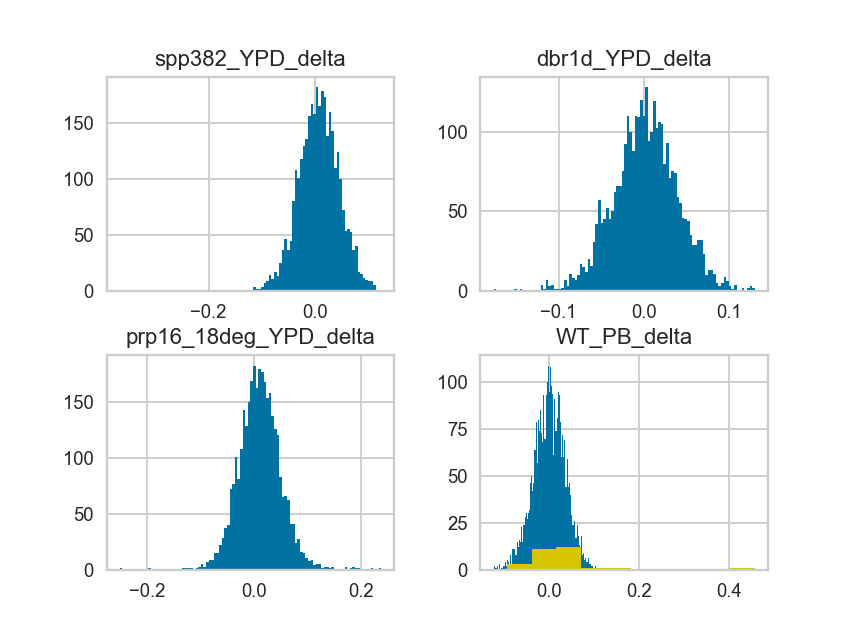

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28a3d7d0>,
      dtype=object)

In [67]:
corr[[f"{label}_delta" for label in all_labels if label != "WT_YPD"]].hist(bins=100)


In [72]:
for label in all_labels:
    print(label)
    top_diff = np.abs(corr[f"{label}_delta"]).sort_values(ascending=False)
    for i in range(20):
        location = list(corr[["ref_index1", "ref_index2", "contig", f"{label}_delta", f"{label}_pvalue"]].loc[top_diff.index[i]])
        if location[4] < 0.01 and np.abs(location[3]) > 0.1 and (location[1] - location[0]) > 5:
            print(location)


WT_YPD
spp382_YPD
[965, 2864, 'RDN25-1', 0.12325614759875562, 0.0012590896337180434]
[2723, 2790, 'RDN25-1', -0.12005109479865383, 0.004054075688005226]
[875, 1448, 'RDN25-1', 0.11717852904723482, 5.625134395640555e-19]
[2196, 2825, 'RDN25-1', 0.11285572528210167, 0.0008375730940304481]
[1132, 2639, 'RDN25-1', 0.11234066520635215, 5.187593955457413e-06]
[648, 2257, 'RDN25-1', 0.11224774832134712, 0.00489001277773118]
[875, 2313, 'RDN25-1', 0.11145689900362439, 0.00026925059461930135]
[897, 2279, 'RDN25-1', 0.10970772346094422, 1.4234482721849504e-07]
[631, 765, 'RDN18-1', -0.10869251598010941, 1.9974646199532809e-07]
[2255, 2864, 'RDN25-1', 0.10854600452914617, 0.0018935422550634118]
[1041, 2842, 'RDN25-1', 0.10806413993521459, 0.00011010242111240554]
dbr1d_YPD
[806, 2639, 'RDN25-1', 0.13013887271481703, 0.0014349149044173026]
[644, 2921, 'RDN25-1', 0.12959573111947853, 1.4772259237789264e-05]
[2415, 2864, 'RDN25-1', 0.12369644503312788, 3.219558022302616e-05]
[875, 2313, 'RDN25-1', 0.

In [73]:
corr = pd.read_csv("figures/summary_data/all_experiment_correlations.csv")

In [213]:
corr = pd.read_csv("figures/summary_data/all_experiment_correlations.csv")
splice = ["spp382_YPD", "dbr1d_YPD", "prp16_18deg_YPD", "WT_PB"] 
splice = [x+"_corr" for x in splice]
non_depletions = [x for x in corr.columns if "corr" in x and x not in ["NOP58GLU_corr", "CBF5GLU_corr"]]


In [214]:
all_labels = [x for x in corr.columns if "corr" in x]
all_pvalues = [x for x in corr.columns if "pvalue" in x]

<IPython.core.display.Javascript object>


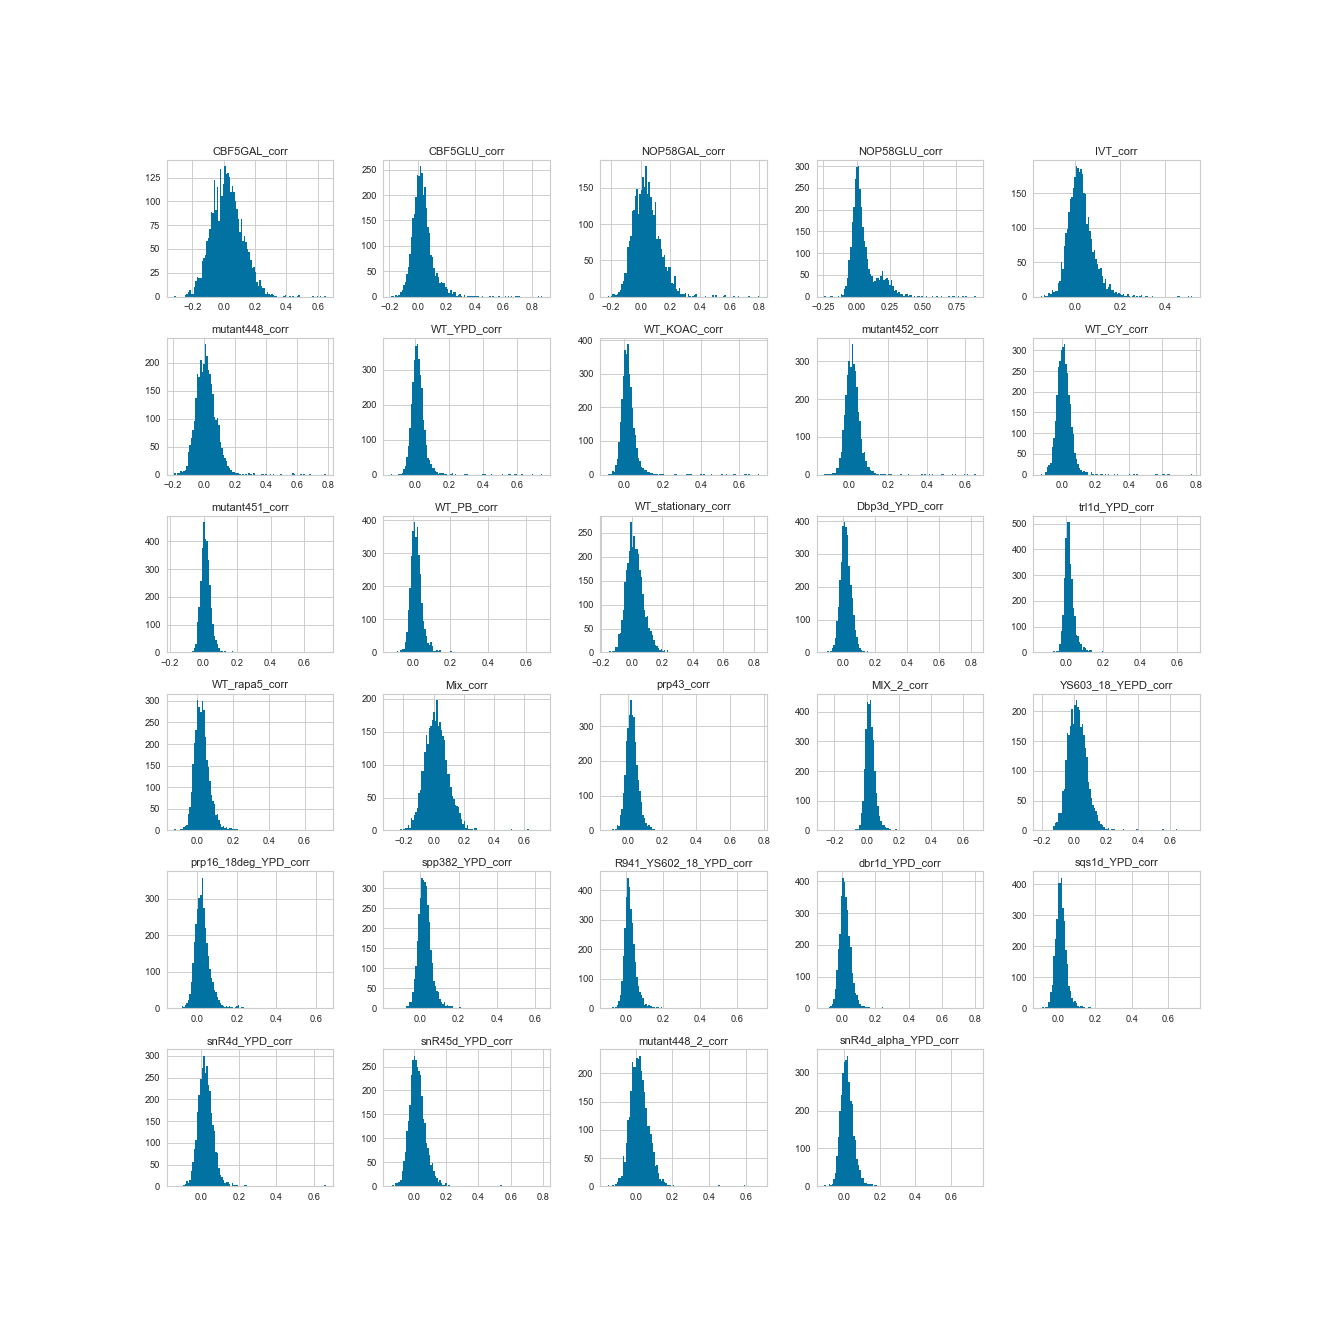

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d919a10>,
      dtype=object)

In [224]:
corr[all_labels].hist(bins=100, figsize=(20, 20))

In [226]:
for i in range(len(corr)):
# for i in range(10):
    data = corr[all_labels].iloc[i]
    pvalues = corr[all_pvalues].iloc[i]

    med = np.median(data)
    ab_div = median_abs_deviation(data, scale='normal')
    nmax = np.median(data) + 4*ab_div
    nmin = np.median(data) - 4*ab_div
    outside_3_div = data[((data > nmax) | (data < nmin)) & (pvalues.values < .001)]
#     splice_hits = [x for x in outside_3_div.index if x in splice]
#     if len(splice_hits) > 0:
#         print(list(corr[["ref_index1", "ref_index2", "contig"]].iloc[i]))
#         print(outside_3_div[splice_hits])
    non_depletions_hits = [x for x in outside_3_div.index if x in non_depletions]
    if len(non_depletions_hits) > 0:
        print(i, list(corr[["ref_index1", "ref_index2", "contig"]].iloc[i]))
        print(outside_3_div[non_depletions_hits])


4 [28, 302, 'RDN18-1']
YS603_18_YEPD_corr    0.123676
Name: 4, dtype: float64
5 [28, 414, 'RDN18-1']
IVT_corr    0.100974
Name: 5, dtype: float64
11 [28, 578, 'RDN18-1']
YS603_18_YEPD_corr    0.153757
Name: 11, dtype: float64
12 [28, 619, 'RDN18-1']
IVT_corr    0.132722
Name: 12, dtype: float64
22 [28, 1187, 'RDN18-1']
Mix_corr    0.170014
Name: 22, dtype: float64
26 [28, 1280, 'RDN18-1']
CBF5GAL_corr    0.253555
Name: 26, dtype: float64
61 [100, 1280, 'RDN18-1']
mutant448_corr    0.147302
Name: 61, dtype: float64
67 [100, 1639, 'RDN18-1']
YS603_18_YEPD_corr    0.141936
Name: 67, dtype: float64
75 [106, 420, 'RDN18-1']
Mix_corr    0.173586
Name: 75, dtype: float64
86 [106, 974, 'RDN18-1']
WT_CY_corr    0.087399
Name: 86, dtype: float64
112 [120, 562, 'RDN18-1']
NOP58GAL_corr    0.241147
Name: 112, dtype: float64
135 [120, 1773, 'RDN18-1']
NOP58GAL_corr    0.230383
Mix_corr         0.205581
Name: 135, dtype: float64
144 [211, 562, 'RDN18-1']
WT_stationary_corr    0.244802
Name: 144, dty

876 [663, 817, 'RDN25-1']
Mix_corr    0.241812
Name: 876, dtype: float64
886 [663, 1042, 'RDN25-1']
Dbp3d_YPD_corr    0.10976
Name: 886, dtype: float64
917 [663, 2416, 'RDN25-1']
Mix_corr   -0.25004
Name: 917, dtype: float64
920 [663, 2619, 'RDN25-1']
WT_rapa5_corr    0.111435
Name: 920, dtype: float64
948 [776, 966, 'RDN25-1']
IVT_corr    0.145924
Name: 948, dtype: float64
950 [776, 990, 'RDN25-1']
WT_stationary_corr    0.163746
Name: 950, dtype: float64
1009 [805, 876, 'RDN25-1']
NOP58GAL_corr    0.302646
Name: 1009, dtype: float64
1071 [807, 817, 'RDN25-1']
prp43_corr   -0.110742
Name: 1071, dtype: float64
1138 [817, 908, 'RDN25-1']
Dbp3d_YPD_corr    0.450046
Name: 1138, dtype: float64
1196 [817, 2959, 'RDN25-1']
NOP58GAL_corr    0.246902
Name: 1196, dtype: float64
1198 [867, 876, 'RDN25-1']
Mix_corr    0.257832
Name: 1198, dtype: float64
1273 [876, 1437, 'RDN25-1']
NOP58GAL_corr    0.320021
Name: 1273, dtype: float64
1274 [876, 1449, 'RDN25-1']
spp382_YPD_corr    0.206435
Name: 127

2963 [2619, 2724, 'RDN25-1']
Dbp3d_YPD_corr    0.388701
Name: 2963, dtype: float64
2988 [2634, 2843, 'RDN25-1']
IVT_corr    0.264846
Name: 2988, dtype: float64
2994 [2634, 2946, 'RDN25-1']
IVT_corr    0.179462
Name: 2994, dtype: float64
3006 [2640, 2865, 'RDN25-1']
IVT_corr    0.131829
Name: 3006, dtype: float64
3015 [2724, 2729, 'RDN25-1']
Dbp3d_YPD_corr   -0.105709
Name: 3015, dtype: float64
3023 [2724, 2870, 'RDN25-1']
NOP58GAL_corr           0.325046
prp16_18deg_YPD_corr    0.146068
Name: 3023, dtype: float64
3028 [2724, 2948, 'RDN25-1']
NOP58GAL_corr    0.259346
Name: 3028, dtype: float64
3029 [2724, 2959, 'RDN25-1']
NOP58GAL_corr    0.365393
Name: 3029, dtype: float64
3060 [2791, 2793, 'RDN25-1']
prp43_corr    0.377524
Name: 3060, dtype: float64
3099 [2826, 2880, 'RDN25-1']
mutant448_corr    0.227519
Name: 3099, dtype: float64
3112 [2843, 2948, 'RDN25-1']
NOP58GAL_corr    0.266229
Name: 3112, dtype: float64
3128 [2870, 2959, 'RDN25-1']
prp16_18deg_YPD_corr    0.201617
Name: 3128,

In [221]:
print(corr[all_labels].iloc[11].to_string())

CBF5GAL_corr              0.160596
CBF5GLU_corr              0.029310
NOP58GAL_corr             0.062942
NOP58GLU_corr             0.372471
IVT_corr                  0.037662
mutant448_corr            0.093902
WT_YPD_corr               0.049267
WT_KOAC_corr              0.028700
mutant452_corr            0.013892
WT_CY_corr               -0.003567
mutant451_corr            0.013438
WT_PB_corr                0.036691
WT_stationary_corr        0.000872
Dbp3d_YPD_corr            0.023205
trl1d_YPD_corr            0.040659
WT_rapa5_corr             0.032974
Mix_corr                  0.011221
prp43_corr                0.077494
MIX_2_corr                0.016280
YS603_18_YEPD_corr        0.153757
prp16_18deg_YPD_corr      0.033660
spp382_YPD_corr           0.062114
R941_YS602_18_YPD_corr    0.037611
dbr1d_YPD_corr            0.023941
sqs1d_YPD_corr            0.036881
snR4d_YPD_corr            0.054094
snR45d_YPD_corr           0.082462
mutant448_2_corr          0.022505
snR4d_alpha_YPD_corr

# Percent mod figures

In [4]:
corrected_pvalues_df = pd.read_csv("figures/summary_data/all_experiment_percent_modification_corrected_pvalues_chi2_and_batch_effects.csv", index_col=0)

In [12]:
corrected_pvalues_df.columns

Index(['contig', 'CBF5GAL_mean', 'CBF5GAL_pvalue', 'CBF5GAL_corrected_pvalue',
       'CBF5GAL_corrected_batch_effect_prob', 'CBF5GLU_mean', 'CBF5GLU_pvalue',
       'CBF5GLU_corrected_pvalue', 'CBF5GLU_corrected_batch_effect_prob',
       'NOP58GAL_mean',
       ...
       'snR45d_YPD_corrected_pvalue', 'snR45d_YPD_corrected_batch_effect_prob',
       'mutant448_2_mean', 'mutant448_2_pvalue',
       'mutant448_2_corrected_pvalue',
       'mutant448_2_corrected_batch_effect_prob', 'snR4d_alpha_YPD_mean',
       'snR4d_alpha_YPD_pvalue', 'snR4d_alpha_YPD_corrected_pvalue',
       'snR4d_alpha_YPD_corrected_batch_effect_prob'],
      dtype='object', length=117)

In [14]:
print(corrected_pvalues_df["dbr1d_YPD_corrected_pvalue"][106])
print(corrected_pvalues_df["dbr1d_YPD_corrected_pvalue"][974])

2.911889705923839e-172
2.457524305104653e-37


In [9]:
all_labels = ["dbr1d_YPD", "spp382_YPD", "prp16_18deg_YPD", "WT_PB"] 


/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7

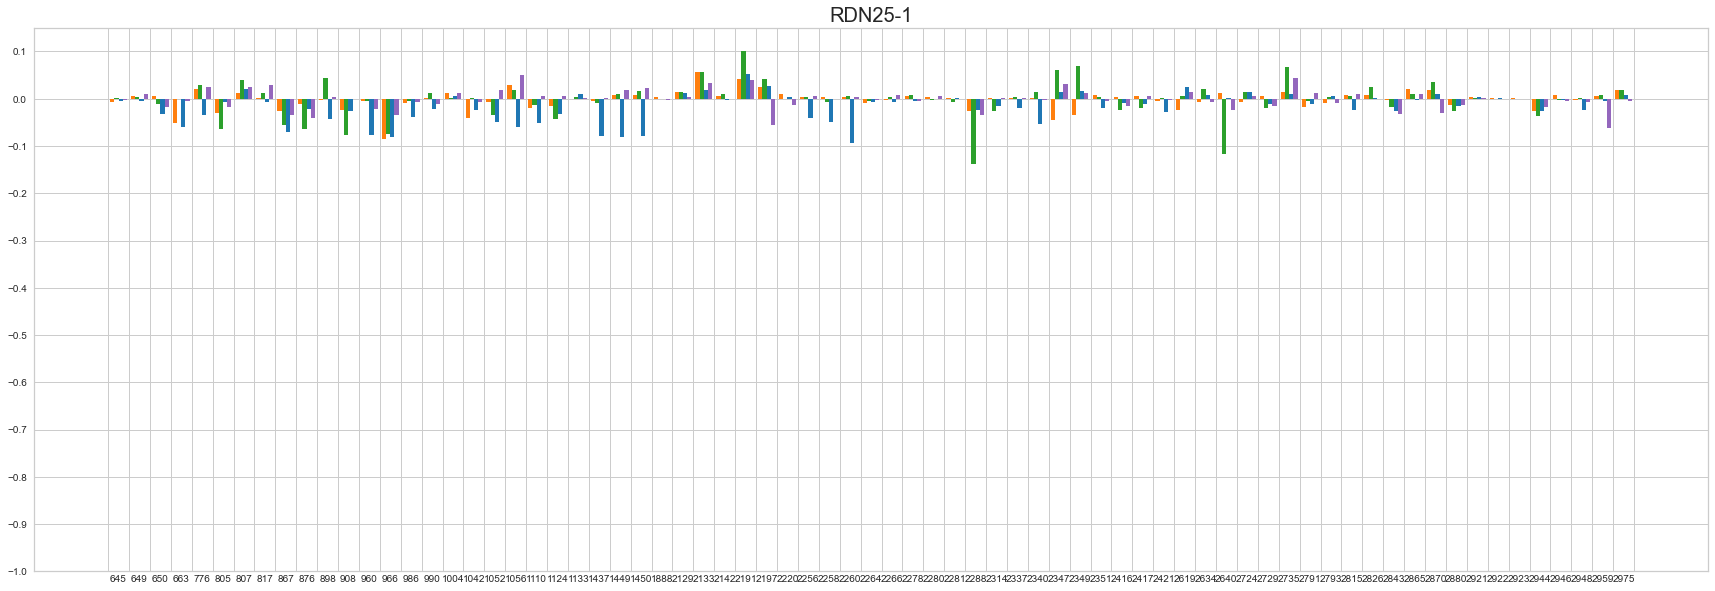

In [10]:
contig = "RDN25-1"
figure_path = f"figures/splicing_mutants/{contig}_splicing_mutations_bargraph.png"

title = contig
pvalue_cutoff = 0.05
mod_threshold = 0
fig, axs = plt.subplots(1, figsize=(30,10))
axs.set_title(title, fontdict={'fontsize':20})
width = 0.8 / len(all_labels)
tab_colors = ['tab:blue', 'tab:green', 'tab:purple', 'tab:orange', 'tab:red', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for i, label in enumerate(all_labels):
    mask = (corrected_pvalues_df["contig"] == contig).values
    y = corrected_pvalues_df[f"{label}_mean"] - corrected_pvalues_df["WT_YPD_mean"] 
    pvalue_mask = (corrected_pvalues_df[f"{label}_corrected_pvalue"] < pvalue_cutoff) * (corrected_pvalues_df[f"{label}_corrected_batch_effect_prob"] < pvalue_cutoff)    
#     colors = pd.DataFrame(["b" if x else "r" for x in pvalue_mask])
    colors = pd.DataFrame([tab_colors[i] for x in pvalue_mask])
    x = y[mask].index
    y = y[mask]
    c = list(colors[mask][0].values)

    if i == 0:
        x1 = np.array(range(len(x)))+(0.5*width)
    if i == 1:
        x1 = np.array(range(len(x)))-(0.5*width)
    if i == 2:
        x1 = np.array(range(len(x)))+(1.5*width)
    if i == 3:
        x1 = np.array(range(len(x)))-(1.5*width)
    if i == 4:
        x1 = np.array(range(len(x)))+(2.5*width)
    if i == 5:
        x1 = np.array(range(len(x)))-(3.5*width)
    if i == 6:
        x1 = np.array(range(len(x)))+(4.5*width)


    axs.bar(x1, y, width, label=label, color=tab_colors[i])
    axs.scatter(x1[pvalue_mask[mask]], y[pvalue_mask&mask] + (np.sign(y[pvalue_mask&mask]) * 0.015), marker="*", color="black", zorder=10, s=250)
    axs.set_xticks(ticks=[x for x in range(len(x))], minor=True)
    axs.set_xticks(ticks=[x-0.5 for x in range(len(x)+1)], minor=False)

    axs.set_yticks(ticks=np.linspace(-1, 1, num=21, endpoint=True))

    axs.set_xticklabels(labels=x, minor=True)
    axs.set_xticklabels(labels=["" for x in x], minor=False)

#     axs.grid(True, which='minor', axis='x')
    axs.grid(True, which='major')

axs.set_ylim(-1, 0.15)
# plt.legend()

if figure_path is not None:
    plt.savefig(figure_path)
else:
    plt.show()
